### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import uniform 

### Exploratory Data Analysis 

1 Loading data into data frame.

In [22]:
data = pd.read_csv('data/coupons.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [23]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2.	Distribution analysis 
Let’s find out % of Accepted and Rejected offers form total count.


In [24]:
Offer_staus_counts = data.groupby('Y').Y.count()
Total_results = data.shape[0]
print('Rejected coupon:', Offer_staus_counts [0],round(Offer_staus_counts [1]/ Total_results*100,0),'%')
print('Accepted coupon:', Offer_staus_counts [1],round(Offer_staus_counts [0]/ Total_results*100,0),'%')


Rejected coupon: 5474 57.0 %
Accepted coupon: 7210 43.0 %


This dataset is partially balanced with acceptance  are approx 57% and reject are approx 43%.

 3 Investigate the dataset for missing or problematic data.
    Lets Remove duplicates and check for missing data

In [25]:
data = data.drop_duplicates()
print("Shape of dataset after removing duplicates:",data.shape)

Shape of dataset after removing duplicates: (12610, 26)


In [7]:
Offer_staus_counts = data.groupby('Y').Y.count()
Total_results = data.shape[0]
print('Rejected coupon:', Offer_staus_counts [0],round(Offer_staus_counts [1]/ Total_results*100,0),'%')
print('Accepted coupon:', Offer_staus_counts [1],round(Offer_staus_counts [0]/ Total_results*100,0),'%')

Rejected coupon: 5453 57.0 %
Accepted coupon: 7157 43.0 %


aftre removing duplicates the dataset is  balanced with acceptance  are approx 57% and reject are approx 43%.

3. Decide what to do about your missing data -- drop, replace, other...

In [26]:

# missing values
print('Is there any missing value present or not?',data.isnull().values.any())


Is there any missing value present or not? True


4. What proportion of the total observations chose to accept the coupon? 



In [27]:
missing_percentage = data.isnull().sum()*100/len(data)
Missng_count = data.isnull().sum()
missing_value_df = pd.DataFrame({'missing_count': Missng_count,'missing_percentage': missing_percentage})
# print only attributs with missing values
missing_value_df[missing_value_df.missing_count != 0]

,missing_count,missing_percentage
car,12502,99.143537
Bar,107,0.848533
CoffeeHouse,217,1.720856
CarryAway,150,1.189532
RestaurantLessThan20,129,1.022998
Restaurant20To50,189,1.498810


While analyzing our dataset, shows that six attributes contain missing values. One of the labels, “car”, is almost completely missing--99%, to be exact--rendering it significantly less important than the other attributes and preventing it from having any sort of predictive power. Consequently, this attribute must be dropped from the dataset to proceed forward with further analysis.

In [28]:


# Replace missing values in data with NaN for consistency

data['Bar']=data['Bar'].fillna(data['Bar'].value_counts().index[0])
data['CoffeeHouse']=data['CoffeeHouse'].fillna(data['CoffeeHouse'].value_counts().index[0])
data['CarryAway']=data['CarryAway'].fillna(data['CarryAway'].value_counts().index[0])
data['RestaurantLessThan20']=data['RestaurantLessThan20'].fillna(data['RestaurantLessThan20'].value_counts().index[0])
data['Restaurant20To50']=data['Restaurant20To50'].fillna(data['Restaurant20To50'].value_counts().index[0])
NewData = data.drop(["car"], axis = 1)
NewData.corr(method ='pearson',numeric_only=True)


,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
temperature,1.000000,-0.018599,NaN,-0.157089,-0.227165,0.097972,-0.097972,0.059393
has_children,-0.018599,1.000000,NaN,0.079434,-0.010773,-0.032353,0.032353,-0.045056
toCoupon_GEQ5min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
toCoupon_GEQ15min,-0.157089,0.079434,NaN,1.000000,0.321260,-0.302066,0.302066,-0.082693
toCoupon_GEQ25min,-0.227165,-0.010773,NaN,0.321260,1.000000,-0.189900,0.189900,-0.108139
direction_same,0.097972,-0.032353,NaN,-0.302066,-0.189900,1.000000,-1.000000,0.014932
direction_opp,-0.097972,0.032353,NaN,0.302066,0.189900,-1.000000,1.000000,-0.014932
Y,0.059393,-0.045056,NaN,-0.082693,-0.108139,0.014932,-0.014932,1.000000


From the correlation result, we can see that attribute ‘toCoupon_GEQ5min’ does not correlate which means all the venues are at least more than five minutes away from the user. We will drop this column.

also we can see that The attributes ‘direction_same’ is perfectly correlated with ‘direction_opp’ have the same correlation so we can drop ‘direction_opp’

In [29]:
NewData = data.drop(["toCoupon_GEQ5min","direction_opp"], axis = 1)
NewData


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,NaN,never,never,1~3,4~8,1~3,0,0,0,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,NaN,never,never,1~3,4~8,1~3,0,0,0,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,NaN,never,never,1~3,4~8,1~3,1,0,0,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,NaN,never,never,1~3,4~8,1~3,1,0,0,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,NaN,never,never,1~3,4~8,1~3,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,NaN,never,never,1~3,4~8,1~3,0,0,1,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,NaN,never,never,1~3,4~8,1~3,0,0,0,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,NaN,never,never,1~3,4~8,1~3,0,0,1,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,NaN,never,never,1~3,4~8,1~3,1,1,0,0


5. Use a bar plot to visualize the `coupon` column.

[Text(0.5, 1.0, 'coupons counts by type of coupon')]

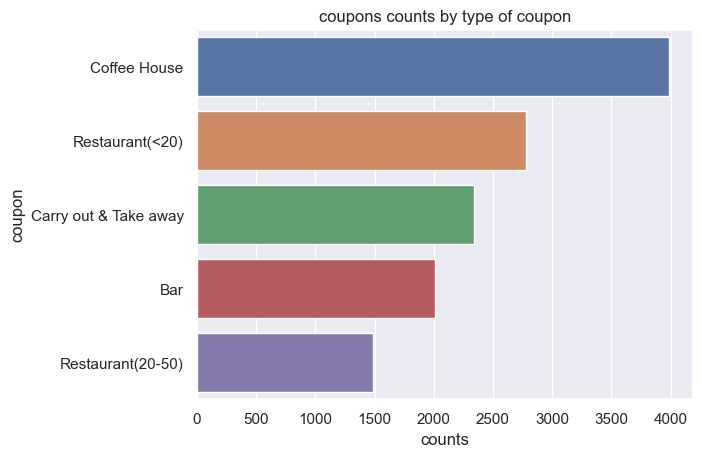

In [30]:
BarData = NewData.value_counts('coupon')
BarData = BarData.reset_index()
BarData.columns = ['coupon', 'counts']

sns.barplot(data=BarData, x="counts", y="coupon").set(title='coupons counts by type of coupon')


6. Use a histogram to visualize the temperature column.

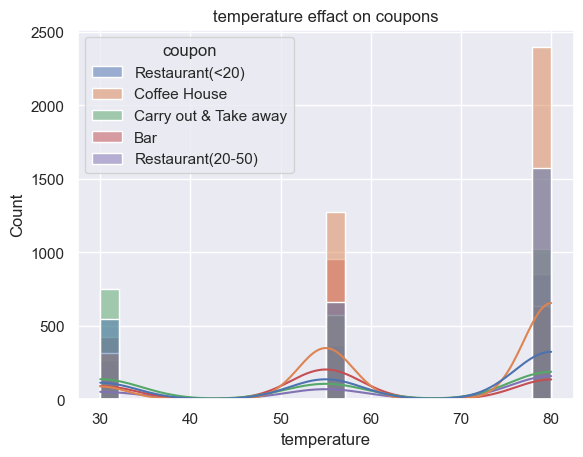

In [31]:
# Plot the histogram thanks to the distplot function
sns.set(style="darkgrid")
sns.histplot(data=data, x="temperature", hue="coupon", kde=True).set(title='temperature effact on coupons')
#sns.histplot( data=data, x="temperature",  kde=False )
#sns.histplot(data= data , x="temperature", kde=True)
plt.show()

The histogram shwos thta higer the temperature more people used the coupons 
lower the temperature more carry out and Take away 
mid range temperature you see uptake on coffee house, bar and restaurant  

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [32]:
Bar_Coupons = data[["Bar"]]


2. What proportion of bar coupons were accepted?


In [33]:
barcount = Bar_Coupons.value_counts()
barcountsize = Bar_Coupons.shape[0] 
bar_CouponsPer = barcount/barcountsize*100

bar_CouponsPer = bar_CouponsPer.reset_index()
bar_CouponsPer.columns = ['Bar', '%']
bar_CouponsPer 


,Bar,%
0,never,41.911182
1,less1,27.264076
2,1~3,19.571768
3,4~8,8.493259
4,gt8,2.759715


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


[Text(0.5, 1.0, 'acceptance rate between bar')]

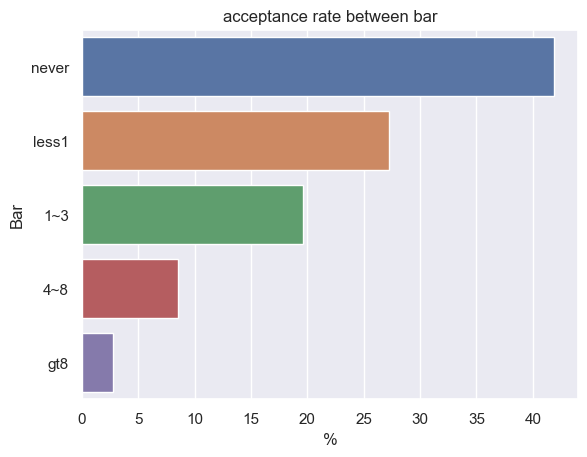

In [34]:

sns.barplot(data=bar_CouponsPer, x= '%', y='Bar').set(title='acceptance rate between bar')

In [47]:
print(bar_CouponsPer)

sumLessthen3 = bar_CouponsPer.iloc[0:3,1].sum(axis=0).round(decimals = 1)
sumMorethen3 = bar_CouponsPer.iloc[3:5,1].sum(axis=0).round(decimals = 1)
print('acceptance rate those who went to a bar 3 or fewer times a month:', sumLessthen3,'%')
print('acceptance rate those who went to a bar  more then 3 times a month:', sumMorethen3,'%')

     Bar          %
0  never  41.911182
1  less1  27.264076
2    1~3  19.571768
3    4~8   8.493259
4    gt8   2.759715
acceptance rate those who went to a bar 3 or fewer times a month: 88.7 %
acceptance rate those who went to a bar  more then 3 times a month: 11.3 %


Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more is 89% to 11%.


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


12610
['never' 'less1' '1~3' '4~8' 'gt8']


[Text(0.5, 1.0, 'acceptance ratefor more than once over age 25')]

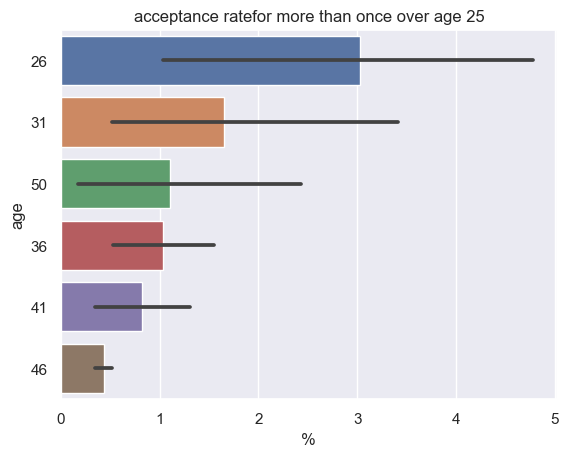

In [48]:


barage_Coupons = data[["Bar","age"]].value_counts()
barage_Coupons = barage_Coupons.reset_index()
barage_Coupons.columns = ['Bar', 'age','sum']
total = barage_Coupons[['sum']].sum(axis=0)
print(total[0])
barage_Coupons['%'] = barage_Coupons['sum'] * 100/ total[0]
print(barage_Coupons["Bar"].unique())

barage_Coupons['age'] = barage_Coupons['age'].replace(['50plus', 'below21'], ['50', '20'])
df25andup = barage_Coupons.query('age > "25" & (Bar == "1~3" | Bar == "4~8" | Bar == "gt8") ')
df25andunder = barage_Coupons.query('age < "25" & (Bar == "1~3" | Bar == "4~8" | Bar == "gt8") ')

sns.barplot(data=df25andup, x= '%', y='age').set(title='acceptance ratefor more than once over age 25')


[Text(0.5, 1.0, 'acceptance rate for more than once under age 25')]

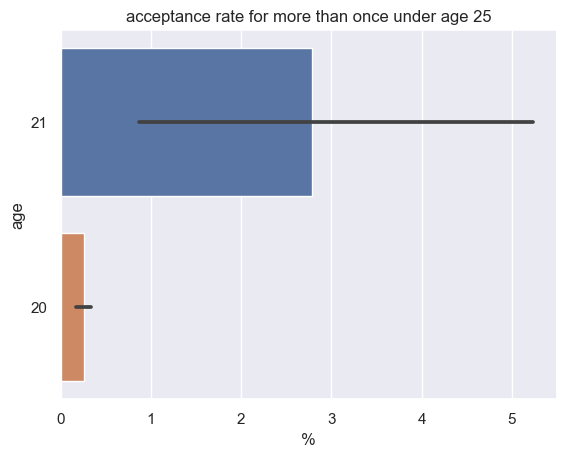

In [49]:
sns.barplot(data=df25andunder, x= '%', y='age').set(title='acceptance rate for more than once under age 25')

the result shows that age between 25 and 30 has higher cceptance rate and also ager 20 and 25 are more likely to accept  coupnn for bar

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


[Text(0.5, 1.0, 'acceptance drivers who do not have kid as psaanger go to bars more than once a month nd had occupations other than farming, fishing, or forestry. ')]

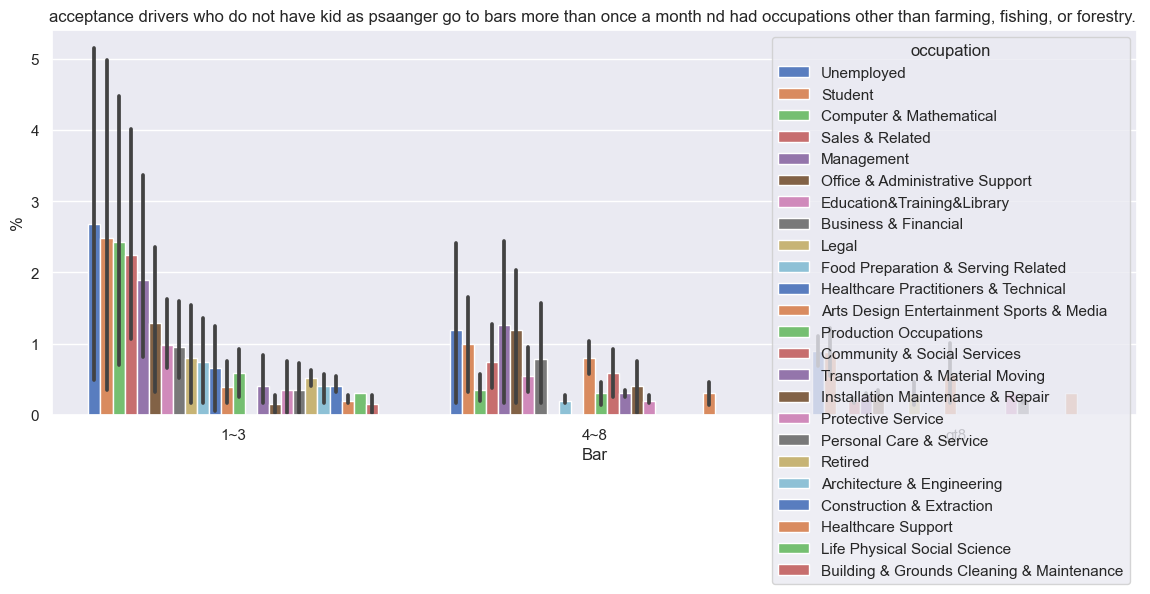

In [82]:
barAgePassOccup_Coupons = data[["Bar","passanger","occupation"]]

barlist = ["1~3","4~8","gt8"]
Occlist = ["farming","fishing","forestry"]
barAgePassOccup_Coupons = barAgePassOccup_Coupons.query('passanger != "Kid(s)"  & (Bar in @barlist) & (occupation not in @Occlist) ')
#barAgePassOccup_Coupons
barAgePassOccup_Coupons = barAgePassOccup_Coupons.value_counts() 
barAgePassOccup_Coupons = barAgePassOccup_Coupons.reset_index()
barAgePassOccup_Coupons.columns = ["Bar","passanger","occupation","sum"]
total = barAgePassOccup_Coupons[['sum']].sum(axis=0)
barAgePassOccup_Coupons['%'] = barAgePassOccup_Coupons['sum'] * 100/ total[0]
#sns.barplot(data=barAgePassOccup_Coupons, x= '%', y='passanger').set(title='acceptance ratefor driers who donot have kid as psaanger ')
plt.figure(figsize=(14, 5))
sns.barplot(data=barAgePassOccup_Coupons,
             x="Bar",
             y="%",
             hue="occupation",
             palette = "muted"
            ).set(title='acceptance drivers who do not have kid as psaanger go to bars more than once a month nd had occupations other than farming, fishing, or forestry. ')

 #plt.title("Bar plot")
 #plt.show()


I am having hard tiime to figuer what which plot to use for represention of  data

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

[Text(0.5, 1.0, 'acceptance drivers ')]

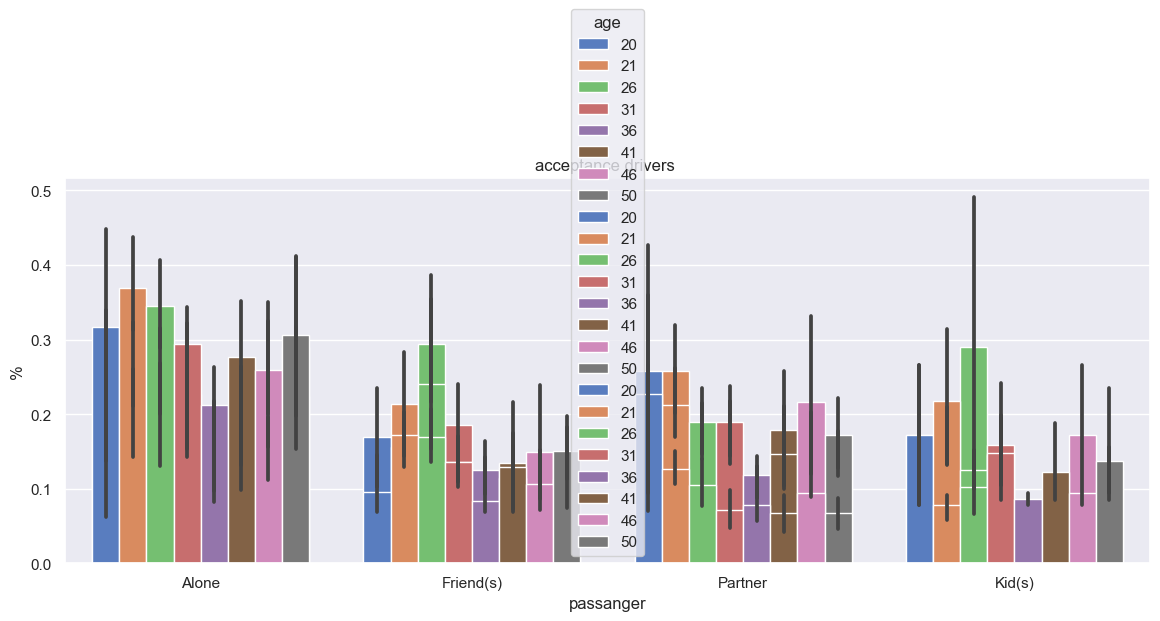

In [116]:
barAgePassInc_Coupons = data[["Bar","passanger","age","RestaurantLessThan20","income"]]

passlist = ["Kid(s)","widowed"]
barlist = ["1~3","4~8","gt8"]
incomlist = ['$37500 - $49999', 'Less than $12500','$25000 - $37499']
#RestaurantLessThan20
bbarAgePassInc_Coupons = barAgePassInc_Coupons.astype({'age':'int'})
# bbarAgePassInc_Coupons.info()
# print(bbarAgePassInc_Coupons["income"].unique())
# print(bbarAgePassInc_Coupons["Bar"].unique())
# print(bbarAgePassInc_Coupons["age"].unique())
bbarAgePassInc_Coupons = bbarAgePassInc_Coupons.query( '((passanger not in @passlist) & (Bar in @barlist)) | ((Bar in @barlist) & ( age < 30 )) | ((income in @incomlist) & (RestaurantLessThan20 in @barlist)) ')
bbarAgePassInc_Coupons = bbarAgePassInc_Coupons.value_counts() 
bbarAgePassInc_Coupons = bbarAgePassInc_Coupons.reset_index()
bbarAgePassInc_Coupons.columns = ["Bar","passanger","age","RestaurantLessThan20","income","sum"]
total = bbarAgePassInc_Coupons[['sum']].sum(axis=0)
bbarAgePassInc_Coupons['%'] = bbarAgePassInc_Coupons['sum'] * 100/ total[0]
plt.figure(figsize=(14, 5))
sns.barplot(data=bbarAgePassInc_Coupons,
             x="Bar",
             y="%",
             hue="age",
             palette = "muted"
            ).set(title='acceptance drivers ')
sns.barplot(data=bbarAgePassInc_Coupons,
             x="RestaurantLessThan20",
             y="%",
             hue="age",
             palette = "muted"
            ).set(title='acceptance drivers ')
sns.barplot(data=bbarAgePassInc_Coupons,
             x="passanger",
             y="%",
             hue="age",
             palette = "muted"
            ).set(title='acceptance drivers ')

Based on observations,we could hypothesize thta drivers who accepted the bar coupons are manly singel and age between 20-30?

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  